#  Example of analysis if WHALES output for Jason 2: warning the CCI J2 data was generated by TUM ... hence different format

In [1]:
import sys
PATH_with_functions = '/home/ardhuin/TOOLS/cci_whales/src'
sys.path.append(PATH_with_functions)

import numpy as np
import xarray as xr

# --- plotting and interactive stuff ----------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import fftconvolve

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})

from altimeters_parameters import alti_read_l2lr,alti_read_l2hrw

import matplotlib.pyplot as plt
import scipy.io
import os
import pathlib

import time


## 1. Reading a GDR file and making some basic plots to know where the data is 

Text(0.5, 0, 'latitude')

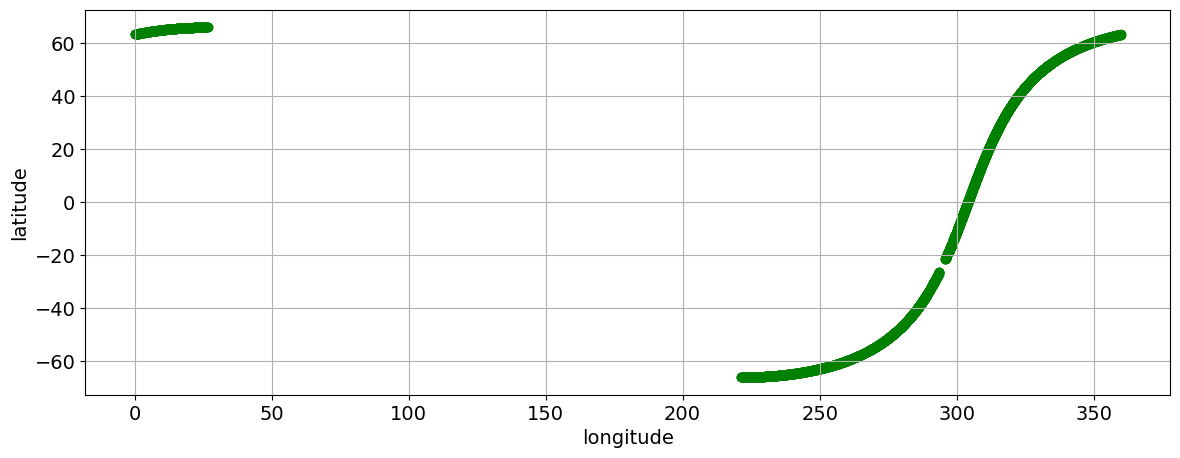

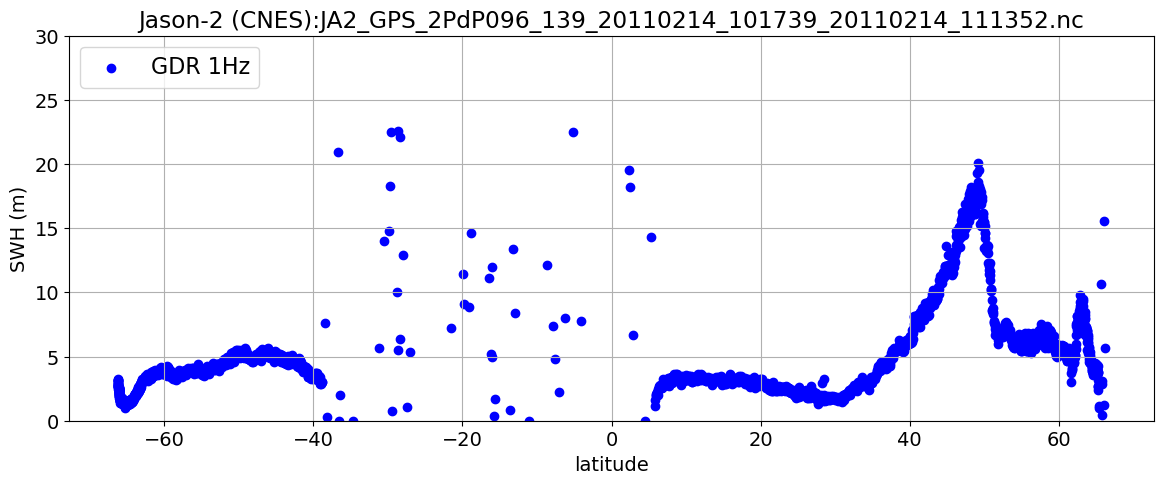

In [2]:

file='JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc' #  this contains storm Quirin (See Hanafin et al. BAMS 2012) 

#file='JA2_GPS_2PdP055_043_20091231_032131_20091231_041744.nc' # big error in CCI-v3/v4 : Baffin Bay 
#file='JA2_GPS_2PdP033_147_20090531_012016_20090531_021629.nc'  big error: iceberg? 
# First a few plots of the 1 Hz data to know where we are ... 

Sgd=alti_read_l2lr('jason2',file)

#S_landmask = np.ma.getdata(S.variables['surface_type'][:])


inds=np.where((np.isfinite(Sgd.swh_1hz)==1))[0]  # &  (S_landmask==0))[0]

fig,axs = plt.subplots(1,1,figsize=(14,5))
ax = axs
im=ax.scatter(Sgd.lon_1hz[inds],Sgd.lat_1hz[inds],c='g',label='GDR')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')


fig,axs = plt.subplots(1,1,figsize=(14,5))
ax = axs
im=ax.scatter(Sgd.lat_1hz[inds],Sgd.swh_1hz[inds],c='b',label='GDR 1Hz')
ax.legend(loc='upper left', fontsize=16)
ax.set_ylim([0,30])
#ax.set_xlim(lat_bounds) 
ax.set_ylabel('SWH (m)')
ax.set_title('Jason-2 (CNES):'+file)
ax.set_xlabel('latitude')


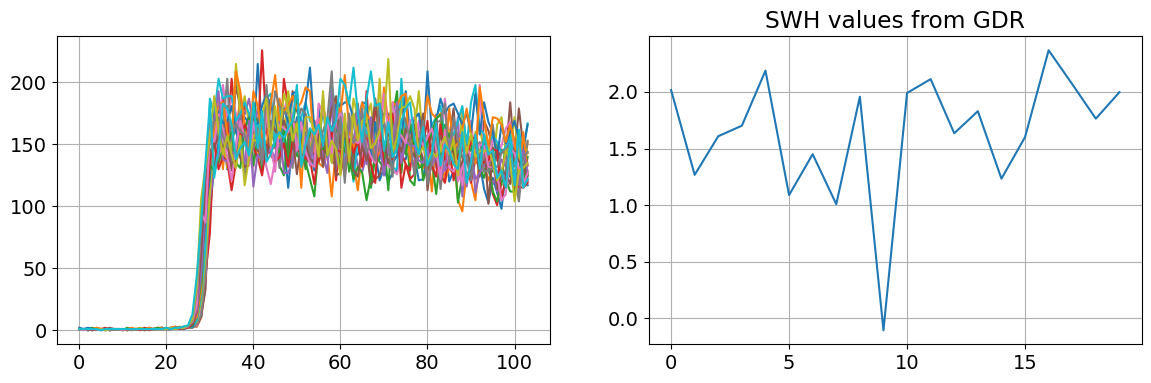

In [3]:
#Now we look at some waveforms ... 
Sg2d=alti_read_l2hrw('jason2',file)

fig,axs = plt.subplots(1,2,figsize=(14,4))
ax = axs[0]
ind=2000
im=ax.plot(Sg2d.waveforms[ind,:,:].T)
ax = axs[1]
im=ax.plot(Sg2d.swh2d[ind,:])
ax.set_title('SWH values from GDR')

ax.grid(True)

## 2. Now we look at our WHALES-retracked results

In [8]:
# 
file='JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc'
#file='SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113.CNES.nc'
#ds_sgdr=xr.open_dataset(file)
#swh_sgdr0=ds_sgdr['data_01']['ku'].variables['swh_ocean']

# the files TEST* were obtained as follows (the -d 1 parameter is there to add the weights and normalized waveforms in the output): 
# conda activate seastatecci_whales
# WARNING: set variable in processing_choices: thrb=0.
# This test should reproduce the CCI-v3 result 
# time python python_WHALES_launcher.py -m jason2 -i JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc -d 1 -o TEST 
# WARNING: set variable in processing_choices: thrb=0.7 
# time python python_WHALES_launcher.py -m jason2 -i JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc -d 1 -o TESTt7 
fileg='/home/ardhuin/PUBLI/2025_SWOTgroups/'+file
file0='/home/ardhuin/PUBLI/2025_SWOTgroups/CCI/'+file
file1='/home/ardhuin/PUBLI/2025_SWOTgroups/TEST/'+file
tag='s0t7m1w1' # 
tag='s0t7m1w2' # 
#tag=''
file2='/home/ardhuin/PUBLI/2025_SWOTgroups/TEST'+tag+'/'+file
Sg = xr.open_dataset(fileg)
S0 = xr.open_dataset(file0)
S1 = xr.open_dataset(file1)
print(file1)
S2 = xr.open_dataset(file2)
print(np.shape(S2.swh_WHALES_20hz))


/home/ardhuin/PUBLI/2025_SWOTgroups/TEST/JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc
(3082, 20)


/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


median std: 0.4924
median std: 0.3418, 0.3414,0.3109
median std: 0.5165
median std: 0.3678, 0.3670,0.3178
median std: 0.7291
median std: 0.5163, 0.5166,0.4934
S1: (3082, 20, 104) ## [-0.95651144 20.613186   20.757792   19.981276   21.121595   19.959167
 18.198338   18.068941   18.244164   -0.95056844 18.045074   19.11229
 16.76409    18.213194   20.101751   19.874924   20.693638   22.38106
 21.03714    19.925858  ]
S2: (3082, 20, 104) ## [20.363445 19.69203  20.361666 20.067467 20.22943  20.263664 18.383883
 18.663622 18.15698  17.960682 18.13038  19.253641 17.04984  18.05361
 19.037706 19.559296 20.143898 21.19897  20.376108 20.009676]


/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


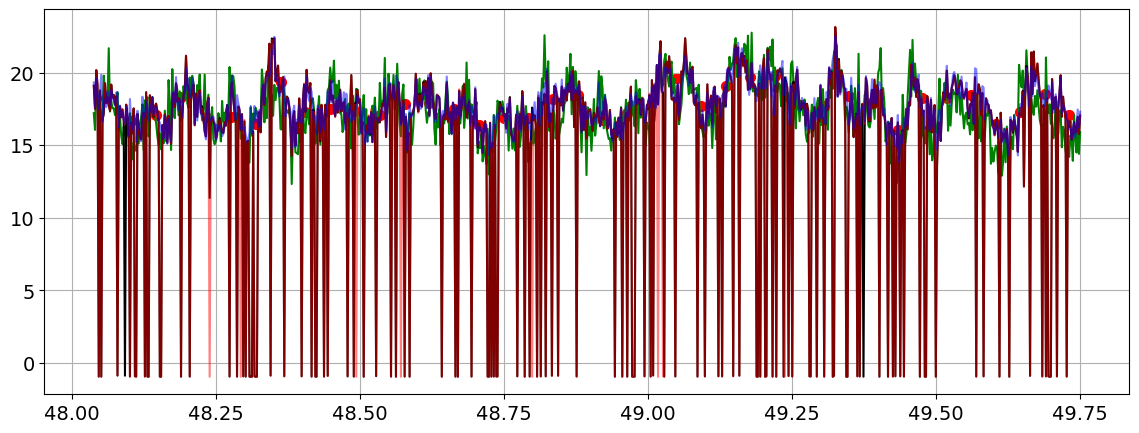

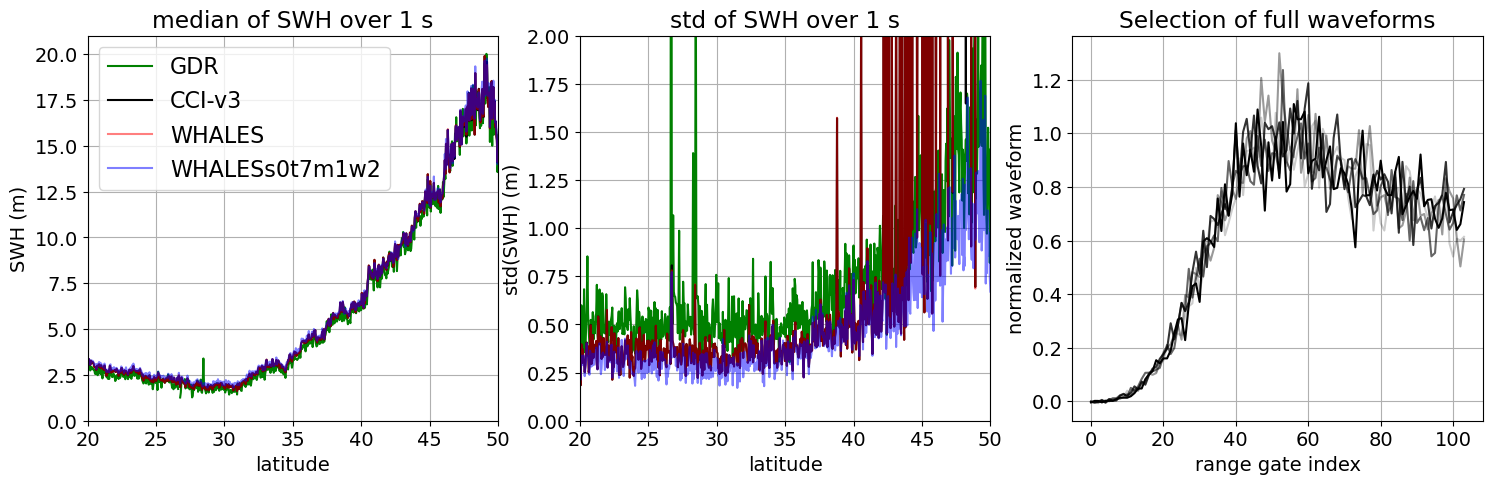

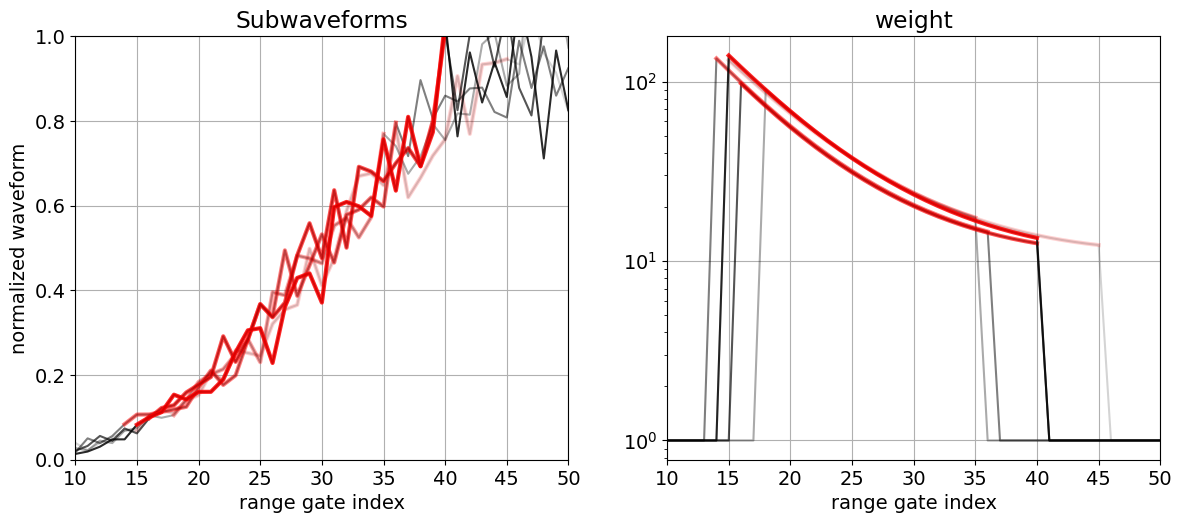

In [9]:
Hs0=S0['swh.07'][:].values
lat0=S0['glat.00'][:].values

x=np.arange(0,104,1)

lati=S2.lat_20hz[:,:].values.flatten()
Hsi=np.interp(lati,lat0,Hs0)
[nt,nr]=np.shape(S2.swh_WHALES_20hz)
Hsi2=Hsi.reshape((nt, nr))

latr=[20,50]
#latr=[20,40]

inds=np.where(S1.lat_20hz[:,0] >48)[0][0:40]

fig,axs = plt.subplots(1,1,figsize=(14,5))
ax = axs
latss=Sg.lat_20hz[inds,:].values.flatten()
im=ax.plot(latss,Sg.swh_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')
im=ax.plot(latss,Hsi2[inds,:].flatten(),c='k',label='CCI-v3')
im=ax.plot(latss,S1.swh_WHALES_20hz[inds,:].values.flatten(),c='r',alpha=0.5,label='WHALES-t7')
im=ax.plot(latss,S2.swh_WHALES_20hz[inds,:].values.flatten(),c='b',alpha=0.5,label='WHALES-t7w2')
im=ax.scatter(S2.lat_20hz[inds,10],np.median(S2.swh_WHALES_20hz[inds,:],axis=1),c='r',s=50,label='WHALES-w2')

fig,axs = plt.subplots(1,3,figsize=(18,5))
ax = axs[0]
im=ax.plot(Sg.lat_20hz[:,0],np.median(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S2.lat_20hz[:,0],np.median(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lat_20hz[:,0],np.median(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES')
im=ax.plot(S2.lat_20hz[:,0],np.median(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES'+tag)

inds=np.where(np.abs(S1.lat_20hz[:,0]-20) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )

inds=np.where(np.abs(S1.lat_20hz[:,0]-30) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )

inds=np.where(np.abs(S1.lat_20hz[:,0]-40) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )


#im=ax.plot(S1.startgate_WHALES)
ax.set_ylim((0,21))
ax.set_title('median of SWH over 1 s')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)

#ax.set_ylim((0,6))
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
ax.legend(loc='upper left', fontsize=16)
ax = axs[1]
im=ax.plot(Sg.lat_20hz[:,0],np.nanstd(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S2.lat_20hz[:,0],np.nanstd(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lat_20hz[:,0],np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES')
im=ax.plot(S2.lat_20hz[:,0],np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-w2')
ax.set_ylim((0,2))
ax.set_title('std of SWH over 1 s')
ax.set_ylabel('std(SWH) (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)
inds=np.where(S1.lat_20hz[:,0] >49)[0]
ind=inds[0]
ax = axs[2]
nt=5

for k in range(nt):
    im=ax.plot(x,S2.normalized_waveform[ind,k,:],c='k',alpha=(k+1)/nt)
axs[2].set_title('Selection of full waveforms')
axs[2].set_xlabel('range gate index')
axs[2].set_ylabel('normalized waveform')
fig.savefig('J2_Kirin_swh_waveforms.pdf')



#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))

fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
#im=ax.scatter(S1.lat_20hz[:,0],S1.swh_WHALES_20hz[:,0])
#im=ax.scatter(S1.lat_20hz[0:-1:20,0],S1.swh_WHALES_20hz[0:-1:20,:])

x=np.arange(0,104,1)
print('S1:',np.shape(S2.normalized_waveform),'##',S1.swh_WHALES_20hz[ind,:].values)
print('S2:',np.shape(S2.normalized_waveform),'##',S2.swh_WHALES_20hz[ind,:].values)

nt=5
for k in range(nt):
    i1=int(S2.startgate_WHALES[ind,k])
    i2=int(S2.endgate_WHALES[ind,k])
    #im=ax.plot(S2.normalized_waveform[ind,k,:])
    ax = axs[0]
    im=ax.plot(x,S2.normalized_waveform[ind,k,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.plot(x[i1:i2],S2.normalized_waveform[ind,k,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
    ax = axs[1]
    im=ax.semilogy(x,S2.weights[ind,k,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.semilogy(x[i1:i2],S2.weights[ind,k,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
axs[0].set_title('Subwaveforms')
axs[0].set_xlabel('range gate index')
axs[0].set_ylabel('normalized waveform')
axs[1].set_title('weight')
axs[1].set_xlabel('range gate index')
#axs[1].set_ylabel('weight')

axs[1].set_xlim(10,50)
axs[0].set_ylim(0.,1.0)
axs[0].set_xlim(10,50)
#im=ax.plot(S2.weights[ind,0,i1:i2],c='k')
#im=ax.plot(S2.weights[ind,0,i1:i2],c='g')
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_ylim((0,12))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag+'.pdf')



dims; 40 20 104
S1: (3082, 20, 104) ## [1.2969911 2.315457  2.5473468 2.2633924 3.1372306 2.353664  2.439641
 3.1833012 2.3698308 1.6337061 2.627768  4.251548  2.193481  2.7417693
 2.1104913 3.3546765 2.690655  3.0610976 2.839308  2.4621441]
S2: (3082, 20, 104) ## [2.0757592 2.2152035 2.6324298 2.5813203 3.2555466 3.4931326 2.4494739
 3.308232  2.5637503 1.6654947 2.924049  5.2810984 2.5727763 2.5939677
 2.410411  3.862611  2.924867  3.2380586 2.91354   2.5967126]


/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


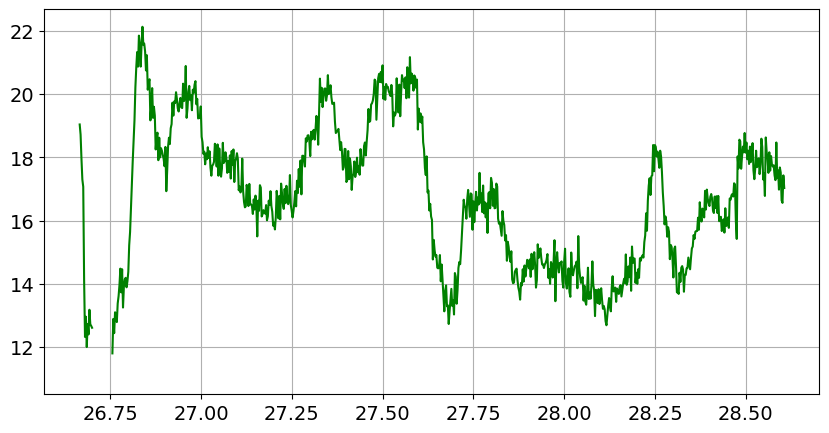

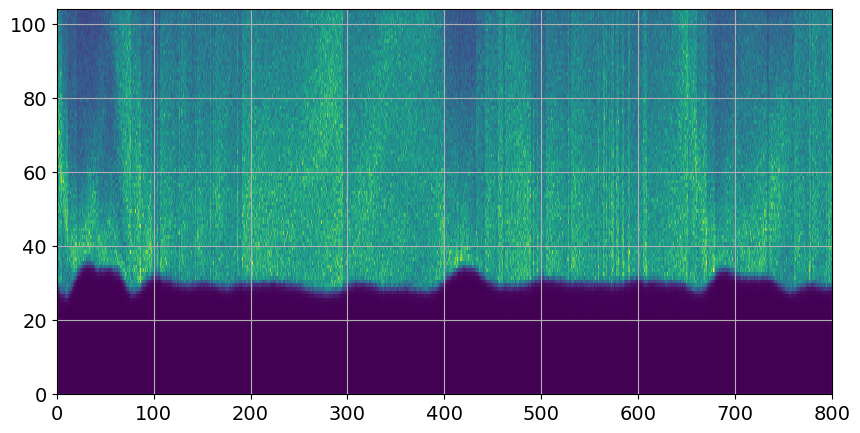

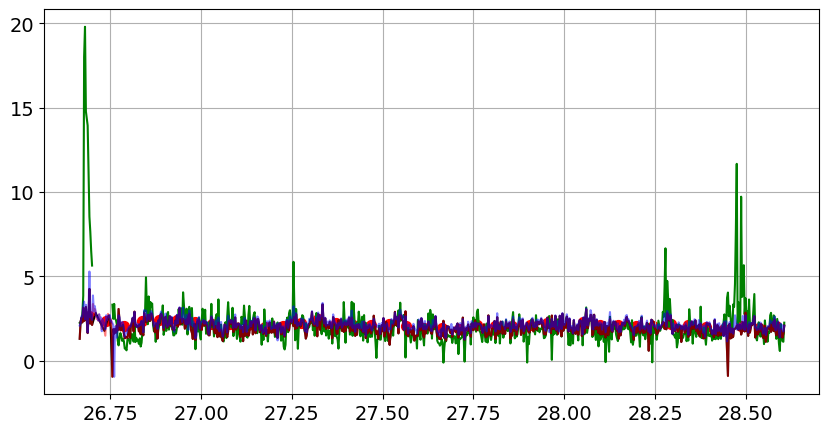

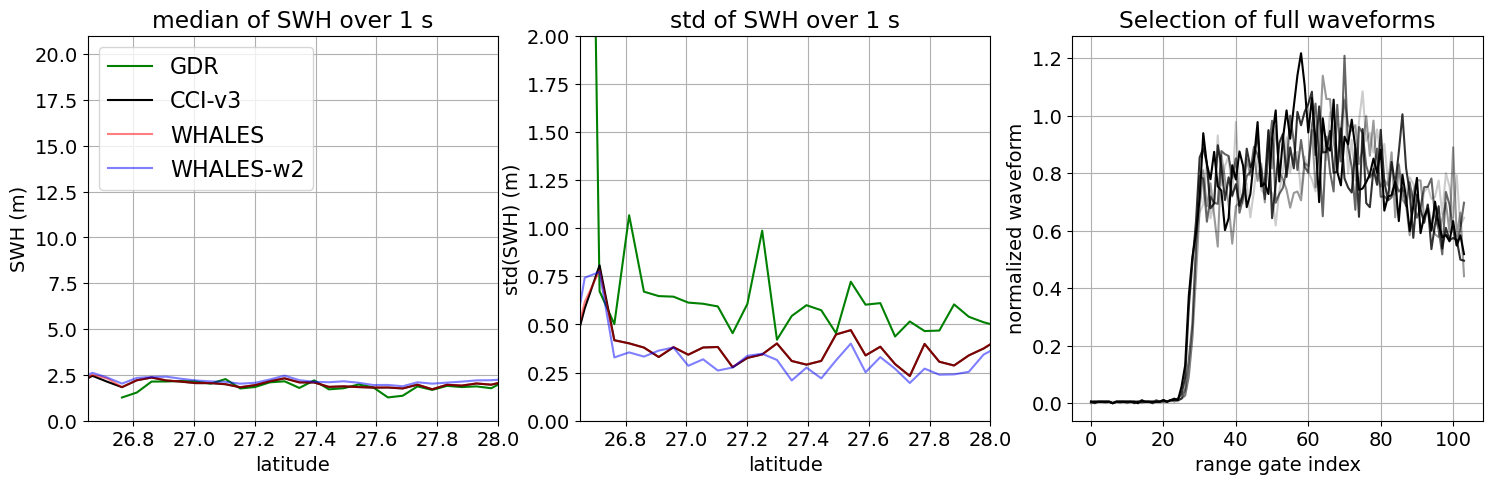

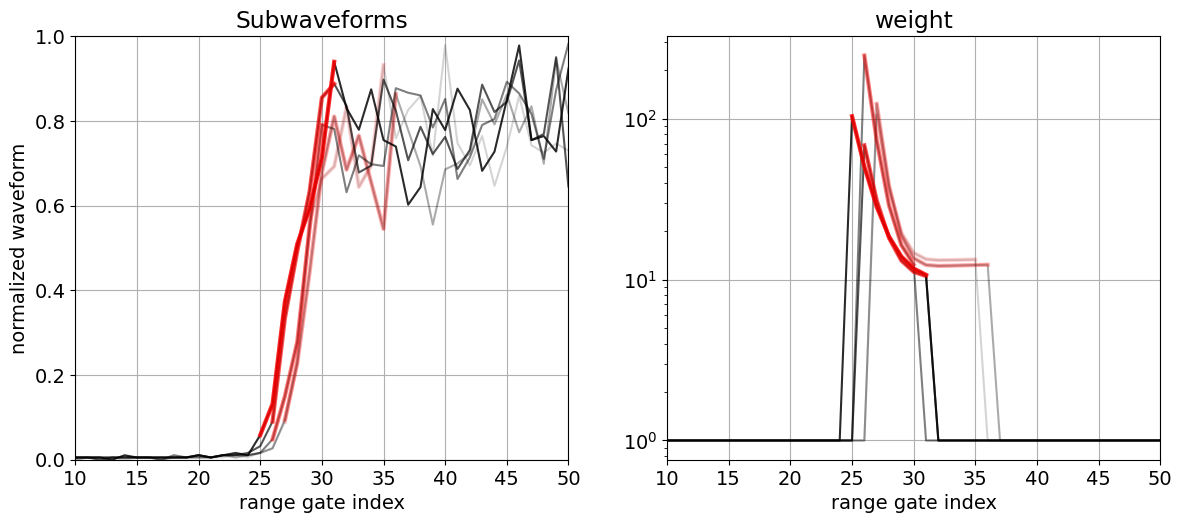

In [10]:
# BLOOMS 

Hs0=S0['swh.07'][:].values
lat0=S0['glat.00'][:].values

lati=S2.lat_20hz[:,:].values.flatten()
Hsi=np.interp(lati,lat0,Hs0)
[nt,nr]=np.shape(S2.swh_WHALES_20hz)
Hsi2=Hsi.reshape((nt, nr))

lat1=26.65
latr=[lat1,28]
#latr=[20,40]
inds=np.where(S1.lat_20hz[:,0] >lat1)[0][0:40]
latss=Sg.lat_20hz[inds,:].values.flatten()


fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(latss,Sg.sig0_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')

fig,axs = plt.subplots(1,1,figsize=(10,5))
[n1,n2,n3]=Sg.waveforms_20hz_ku[inds,:].shape
print('dims;',n1,n2,n3)
waveforms=Sg.waveforms_20hz_ku[inds,:].values.reshape((n1*n2,n3))
ax = axs
im=ax.pcolormesh(waveforms.T)



fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(latss,Sg.swh_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')
im=ax.plot(latss,Hsi2[inds,:].flatten(),c='k',label='CCI-v3')
im=ax.plot(latss,S1.swh_WHALES_20hz[inds,:].values.flatten(),c='r',alpha=0.5,label='WHALES')
im=ax.plot(latss,S2.swh_WHALES_20hz[inds,:].values.flatten(),c='b',alpha=0.5,label='WHALES-w2')
im=ax.scatter(S2.lat_20hz[inds,10],np.median(S2.swh_WHALES_20hz[inds,:],axis=1),c='r',s=50,label='WHALES-w2')


fig,axs = plt.subplots(1,3,figsize=(18,5))
ax = axs[0]
im=ax.plot(Sg.lat_20hz[:,0],np.median(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S2.lat_20hz[:,0],np.median(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lat_20hz[:,0],np.median(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES')
im=ax.plot(S2.lat_20hz[:,0],np.median(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-w2')


#im=ax.plot(S1.startgate_WHALES)
ax.set_ylim((0,21))
ax.set_title('median of SWH over 1 s')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)

#ax.set_ylim((0,6))
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
ax.legend(loc='upper left', fontsize=16)


x=np.arange(0,104,1)
ax = axs[1]
im=ax.plot(Sg.lat_20hz[:,0],np.nanstd(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S2.lat_20hz[:,0],np.nanstd(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lat_20hz[:,0],np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES')
im=ax.plot(S2.lat_20hz[:,0],np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-w2')
ax.set_ylim((0,2))
ax.set_title('std of SWH over 1 s')
ax.set_ylabel('std(SWH) (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)
inds=np.where(S1.lat_20hz[:,0] >lat1)[0]
ind=inds[0]
ax = axs[2]
n1=0
nt=5
for k in range(nt):
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/nt)
axs[2].set_title('Selection of full waveforms')
axs[2].set_xlabel('range gate index')
axs[2].set_ylabel('normalized waveform')
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag+'_low.pdf')


fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
#im=ax.scatter(S1.lat_20hz[:,0],S1.swh_WHALES_20hz[:,0])
#im=ax.scatter(S1.lat_20hz[0:-1:20,0],S1.swh_WHALES_20hz[0:-1:20,:])

x=np.arange(0,104,1)
print('S1:',np.shape(S2.normalized_waveform),'##',S1.swh_WHALES_20hz[ind,:].values)
print('S2:',np.shape(S2.normalized_waveform),'##',S2.swh_WHALES_20hz[ind,:].values)

for k in range(nt):
    i1=int(S2.startgate_WHALES[ind,k+n1])
    i2=int(S2.endgate_WHALES[ind,k+n1])
    #im=ax.plot(S2.normalized_waveform[ind,k,:])
    ax = axs[0]
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.plot(x[i1:i2],S2.normalized_waveform[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
    ax = axs[1]
    im=ax.semilogy(x,S2.weights[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.semilogy(x[i1:i2],S2.weights[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
axs[0].set_title('Subwaveforms')
axs[0].set_xlabel('range gate index')
axs[0].set_ylabel('normalized waveform')
axs[1].set_title('weight')
axs[1].set_xlabel('range gate index')
#axs[1].set_ylabel('weight')

axs[1].set_xlim(10,50)
axs[0].set_ylim(0,1)
axs[0].set_xlim(10,50)
#im=ax.plot(S2.weights[ind,0,i1:i2],c='k')
#im=ax.plot(S2.weights[ind,0,i1:i2],c='g')
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_ylim((0,12))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag+'_low.pdf')



dims; 40 20 104
HEY: 222.92728 , lat: [-66.13412  -66.13244  -66.13064  -66.12873  -66.1267   -66.12456
 -66.1223   -66.11993  -66.11744  -66.11484  -66.112114 -66.10928
 -66.10633  -66.103264 -66.10008  -66.09679  -66.093376 -66.08985
 -66.08621  -66.08246  -66.07858  -66.0746   -66.0705   -66.066284
 -66.06196  -66.05751  -66.05295  -66.04828  -66.04349  -66.03859
 -66.03357  -66.02844  -66.02319  -66.01784  -66.01237  -66.006775
 -66.001076 -65.99526  -65.989334 -65.98329 ] [2.984047  3.2222357 2.8872633 2.7301362 2.907103  2.7546453 2.9253871
 2.8419075 2.6598628 2.6663282 2.8488483 2.7204502 2.758975  2.537695
 2.6385453 2.618432  2.6266046 2.785489  2.7797189 2.5962641 2.6636095
 2.592532  2.6574528 2.7956967 2.4770596 2.5358968 2.4938483 2.3981972
 2.4690948 2.224132  2.4302373 2.3313282 2.1888776 2.29535   2.1969614
 2.1923418 2.318955  2.1164165 2.0760176 2.0458066]
median std: 0.7291
median std: 0.5163, 0.5166,0.4934
S1: (3082, 20, 104) ## [3.0733147 3.0940733 2.694531  3.282

/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


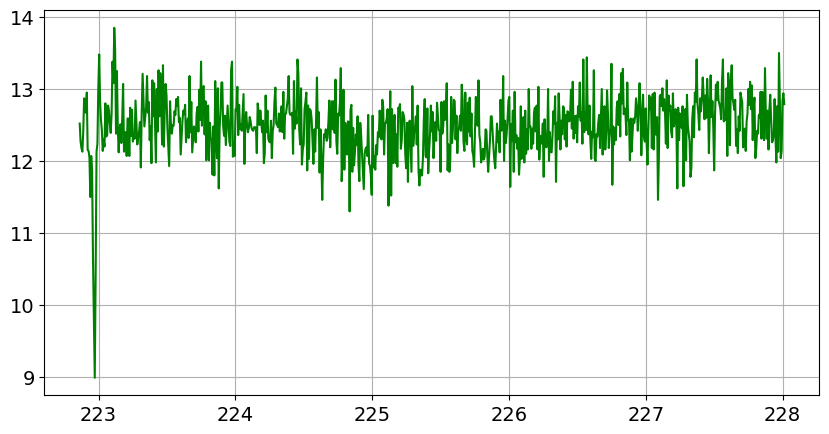

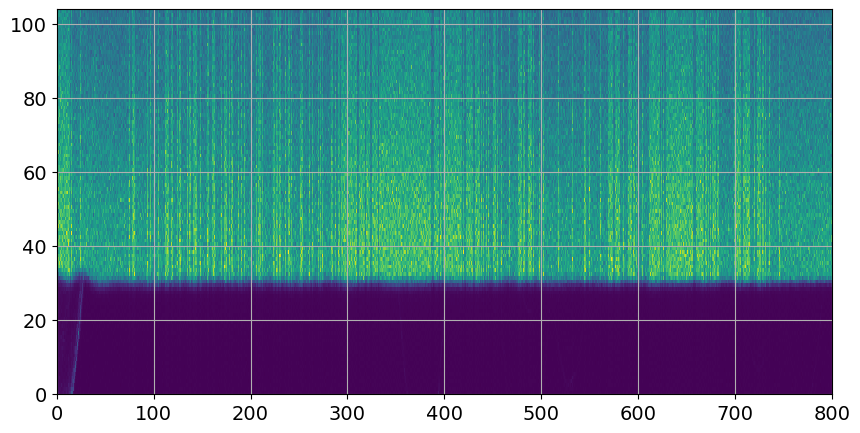

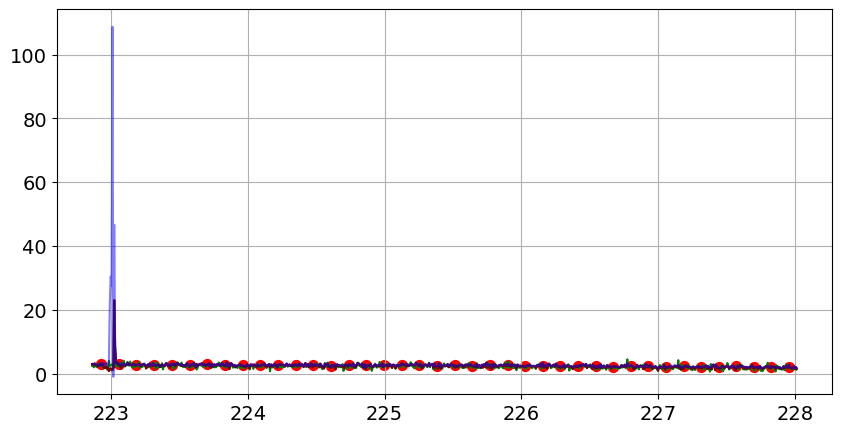

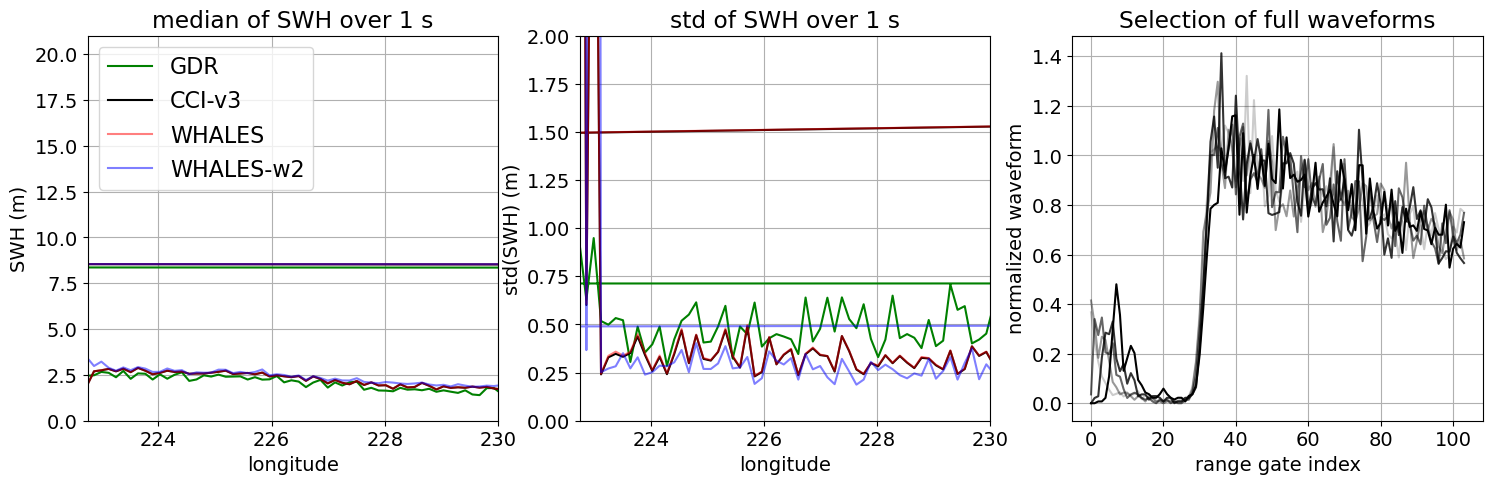

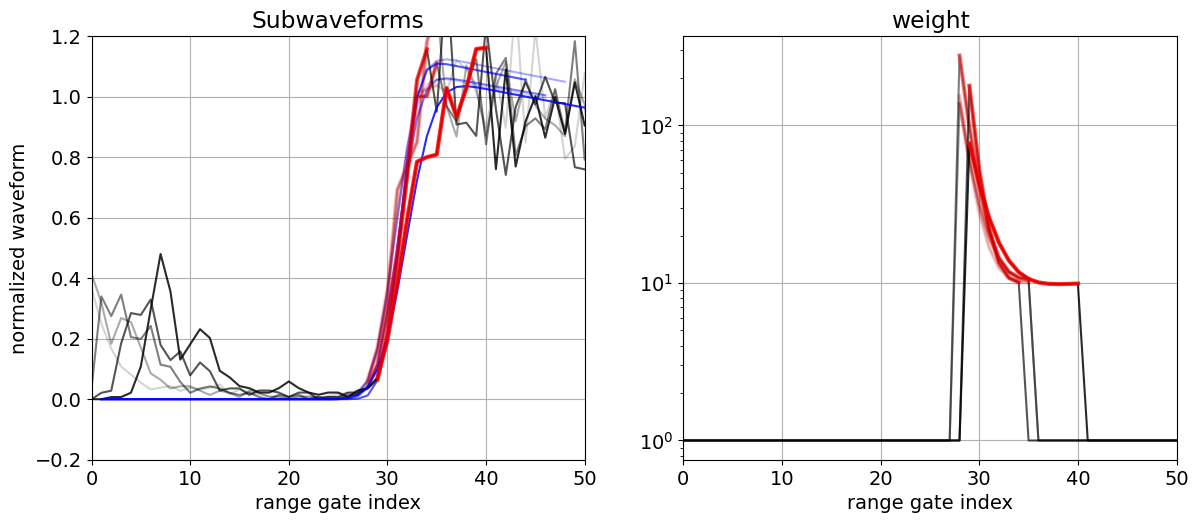

In [11]:
Hs0=S0['swh.07'][:].values
lat0=S0['glat.00'][:].values

lati=S2.lat_20hz[:,:].values.flatten()
Hsi=np.interp(lati,lat0,Hs0)
[nt,nr]=np.shape(S2.swh_WHALES_20hz)
Hsi2=Hsi.reshape((nt, nr))

lat1=-66.15 #26.65
lon1=222.75
latr=[lat1,-66]
lonr=[lon1,230]
#latr=[20,40]
inds=np.where(S1.lon_20hz[:,0] >lon1)[0][0:40]
lonss=Sg.lon_20hz[inds,:].values.flatten()


fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(lonss,Sg.sig0_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')

fig,axs = plt.subplots(1,1,figsize=(10,5))
[n1,n2,n3]=Sg.waveforms_20hz_ku[inds,:].shape
print('dims;',n1,n2,n3)
waveforms=Sg.waveforms_20hz_ku[inds,:].values.reshape((n1*n2,n3))
ax = axs
im=ax.pcolormesh(waveforms.T)



fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(lonss,Sg.swh_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')
im=ax.plot(lonss,Hsi2[inds,:].flatten(),c='k',label='CCI-v3')
im=ax.plot(lonss,S1.swh_WHALES_20hz[inds,:].values.flatten(),c='r',alpha=0.5,label='WHALES')
im=ax.plot(lonss,S2.swh_WHALES_20hz[inds,:].values.flatten(),c='b',alpha=0.5,label='WHALES-w2')
im=ax.scatter(S2.lon_20hz[inds,10],np.median(S2.swh_WHALES_20hz[inds,:],axis=1),c='r',s=50,label='WHALES-w2')

print('HEY:',S2.lon_20hz[inds[0],10].values,', lat:',S2.lat_20hz[inds,10].values,np.median(S2.swh_WHALES_20hz[inds,:],axis=1))

fig,axs = plt.subplots(1,3,figsize=(18,5))
ax = axs[0]
im=ax.plot(Sg.lon_20hz[:,0],np.median(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S2.lon_20hz[:,0],np.median(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lon_20hz[:,0],np.median(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES')
im=ax.plot(S2.lon_20hz[:,0],np.median(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-w2')

inds=np.where(np.abs(S1.lat_20hz[:,0]-40) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )


#im=ax.plot(S1.startgate_WHALES)
ax.set_ylim((0,21))
ax.set_title('median of SWH over 1 s')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('longitude')
ax.set_xlim(lonr)

#ax.set_ylim((0,6))
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
ax.legend(loc='upper left', fontsize=16)
ax = axs[1]
im=ax.plot(Sg.lon_20hz[:,0],np.nanstd(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S2.lon_20hz[:,0],np.nanstd(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lon_20hz[:,0],np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES')
im=ax.plot(S2.lon_20hz[:,0],np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-w2')
ax.set_ylim((0,2))
ax.set_title('std of SWH over 1 s')
ax.set_ylabel('std(SWH) (m)')
ax.set_xlabel('longitude')
ax.set_xlim(lonr)
inds=np.where(S1.lon_20hz[:,0] >lon1)[0]
ind=inds[0]
ax = axs[2]
n1=15
nt=5
for k in range(nt):
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/nt)
axs[2].set_title('Selection of full waveforms')
axs[2].set_xlabel('range gate index')
axs[2].set_ylabel('normalized waveform')
fig.savefig('J2_Kirin_waveforms_TEST'+tag+'_iceberg.pdf')



#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))

fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
#im=ax.scatter(S1.lat_20hz[:,0],S1.swh_WHALES_20hz[:,0])
#im=ax.scatter(S1.lat_20hz[0:-1:20,0],S1.swh_WHALES_20hz[0:-1:20,:])

x=np.arange(0,104,1)
print('S1:',np.shape(S2.normalized_waveform),'##',S1.swh_WHALES_20hz[ind,:].values)
print('S2:',np.shape(S2.normalized_waveform),'##',S2.swh_WHALES_20hz[ind,:].values)


for k in range(nt):
    i1=int(S2.startgate_WHALES[ind,k+n1])
    i2=int(S2.endgate_WHALES[ind,k+n1])
    #im=ax.plot(S2.normalized_waveform[ind,k,:])
    ax = axs[0]
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.plot(x,S2.fitted_waveform[ind,k+n1,:],c='b',alpha=(k+1)/(nt+1))
    im=ax.plot(x[i1:i2],S2.normalized_waveform[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
    ax = axs[1]
    im=ax.semilogy(x,S2.weights[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.semilogy(x[i1:i2],S2.weights[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
axs[0].set_title('Subwaveforms')
axs[0].set_xlabel('range gate index')
axs[0].set_ylabel('normalized waveform')
axs[1].set_title('weight')
axs[1].set_xlabel('range gate index')
#axs[1].set_ylabel('weight')

axs[1].set_xlim(0,50)
axs[0].set_ylim(-0.2,1.2)
axs[0].set_xlim(0,50)
#im=ax.plot(S2.weights[ind,0,i1:i2],c='k')
#im=ax.plot(S2.weights[ind,0,i1:i2],c='g')
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_ylim((0,12))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag+'_iceberg.pdf')

